In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
from xgboost import XGBClassifier

In [2]:
# Load the preprocessed data
data_path = '../data/processed_data.csv'
df = pd.read_csv(data_path)

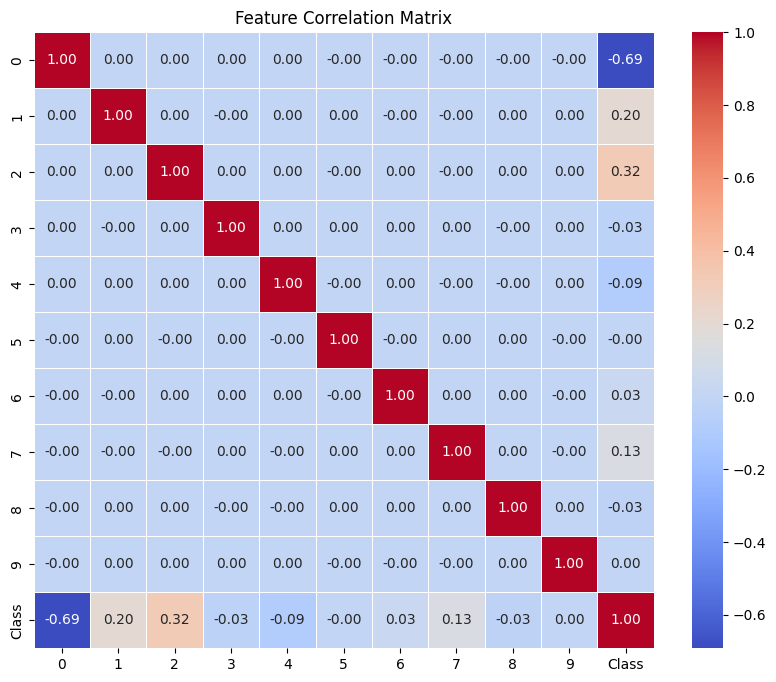

In [3]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.savefig('../visualizations/correlation_matrix.png')
plt.show()

In [4]:
# # Pairplot for Visualizing Relationships between Features
# sns.pairplot(df, hue='Class', diag_kind='kde')
# plt.title("Pairplot of Features")
# plt.savefig('../visualizations/pairplot.png')
# plt.show()

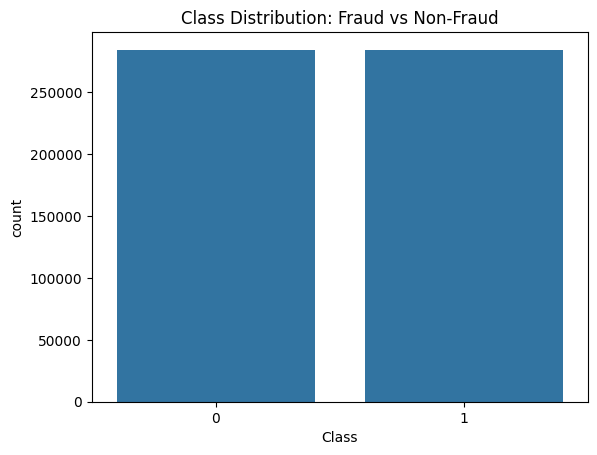

In [5]:
# Class Imbalance Visualization
sns.countplot(x='Class', data=df)
plt.title("Class Distribution: Fraud vs Non-Fraud")
plt.savefig('../visualizations/class_distribution.png')
plt.show()

In [7]:
# Feature Importance using the saved XGBoost model
# Load the XGBoost model from the saved pickle file
model_path = '../models/xgboost_model.pkl'
with open(model_path, 'rb') as file:
    xgb_model = pickle.load(file)

# Prepare the data for feature importance
X = df.drop('Class', axis=1)
y = df['Class']

# Get feature importance from the saved XGBoost model
importance = xgb_model.feature_importances_

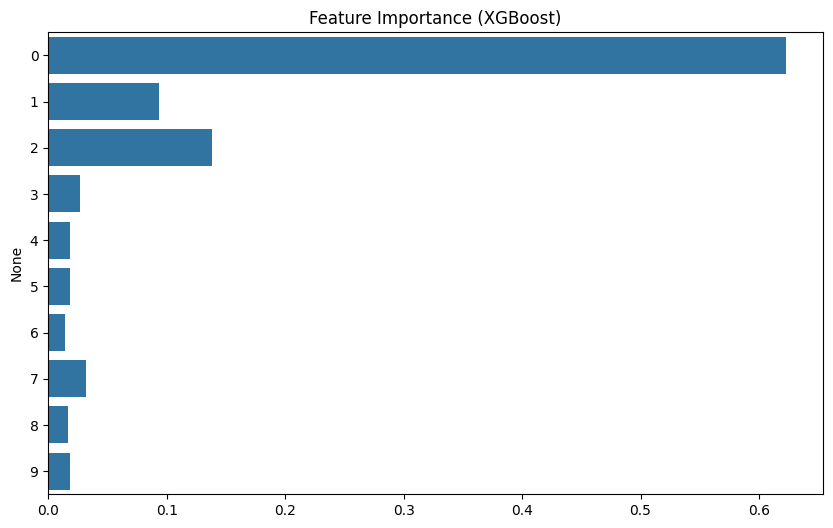

In [8]:
# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance (XGBoost)')
plt.savefig('../visualizations/feature_importance.png')
plt.show()